In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns 
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
ez = np.zeros(200)
hy = np.zeros(200)
imp0 = 377.0

`ez` nodes are to the left or `hz` nodes

In [5]:
S_c = 1 # Courant number

In [6]:
def update_hy (hy, ez, imp0):
    arr_Size = hy.size()
    temp_arr = np.zeros(arr_Size)

    temp_arr[:-1] = hy[:-1] + (ez[1:]-ez[:-1]) / imp0

    return temp_arr

In [7]:
def update_ez (hy, ez, imp0):
    arr_Size = ez.size()
    temp_arr = np.zeros(arr_Size)

    temp_arr[1:] = ez[1:] + (hy[1:]-hy[:-1]) * imp0

    return temp_arr

In [47]:
def minimalRun (size, imp0 = 377.0, maxTime = 250):
    ez = np.zeros((maxTime, size))
    hy = np.zeros((maxTime, size))


    for qTime in range(0, maxTime, 1):
        for mm in range(0, size-1, 1):
            hy[qTime][mm] = hy[qTime-1][mm] + (ez[qTime-1][mm + 1] - ez[qTime-1][mm]) / imp0

        for mm in range(1, size, 1):
            ez[qTime][mm] = ez[qTime-1][mm] + (hy[qTime][mm] - hy[qTime][mm - 1]) * imp0

        ez[qTime][0] = np.exp(-(qTime-30)*(qTime-30)/100)

    return hy, ez

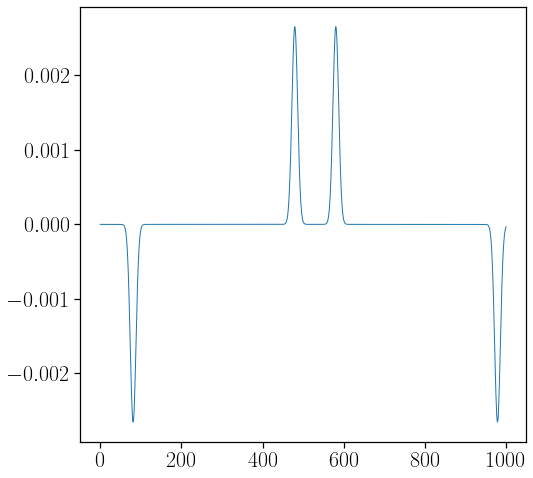

In [101]:
hy, ez = minimalRun(250, maxTime=1000)

#hy_plot = hy[]

# hy_plot

plt.figure(figsize=(8,8))

# plt.plot(phiEven1,energyEven1, linewidth=0, marker='o', markersize=0.1)

plt.plot(hy[:,50], linewidth='1')

In [100]:
hy[:,50].shape

(1000,)

In [84]:
import matplotlib.animation as animation
from IPython.display import HTML 

def anim_1D(x, u):

    frame_count = u.shape[0]

    fig, ax = plt.subplots()
    line, = ax.plot(x, u[0,:])
    plt.ylim(np.min(u)*1.1,np.max(u)*1.1)
    plt.xlabel('x'), plt.ylabel('T')

    def init():  # only required for blitting to give a clean slate.
        line.set_ydata([np.nan] * len(x))
        return line,

    def animate(i):
        #print(i)
        line.set_ydata(u[i,:])  # update the data.
        return line,

    ani = animation.FuncAnimation(
        fig, animate, init_func=init, interval=20, blit=True, save_count=50, frames=frame_count)
    
    plt.close(ani._fig)
    
    return ani

hy, ez = minimalRun(200, maxTime=1000)

# Now use the function
ani = anim_1D(range(200), hy)
HTML(ani.to_html5_video())

---
---
---

In [91]:
def additiveSource (size, imp0 = 377.0, maxTime = 500):
    ez = np.zeros((maxTime, size))
    hy = np.zeros((maxTime, size))


    for qTime in range(0, maxTime, 1):
        for mm in range(0, size-1, 1):
            hy[qTime][mm] = hy[qTime-1][mm] + (ez[qTime-1][mm + 1] - ez[qTime-1][mm]) / imp0

        for mm in range(1, size, 1):
            ez[qTime][mm] = ez[qTime-1][mm] + (hy[qTime][mm] - hy[qTime][mm - 1]) * imp0

        ez[qTime][50] = ez[qTime][50] + np.exp(-(qTime - 30) * (qTime - 30) / 100)

        # ez[qTime][0] = np.exp(-(qTime-30)*(qTime-30)/100)

    return hy, ez

In [92]:
hy, ez = additiveSource(200)

# Now use the function
ani = anim_1D(range(200), hy)
HTML(ani.to_html5_video())